# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

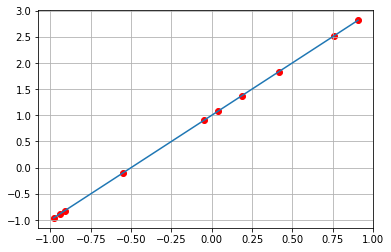

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [2]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [3]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 3.2130 - mse: 3.2130 - val_loss: 2.8541 - val_mse: 2.8541
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 1.8885 - mse: 1.8885 - val_loss: 1.8119 - val_mse: 1.8119
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 1.1673 - mse: 1.1673 - val_loss: 1.1673 - val_mse: 1.1673
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7378 - mse: 0.7378 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4746 - mse: 0.4746 - val_loss: 0.4977 - val_mse: 0.4977
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3073 - mse: 0.3073 - val_loss: 0.3225 - val_mse: 0.3225
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987 - val_loss: 0.2101 - val_mse: 0.2101
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.12

In [4]:
# return weights
model.get_weights()

[array([[1.9953924]], dtype=float32), array([0.99998033], dtype=float32)]

1/1 [==============================] - 0s 1ms/step - loss: 9.7228e-06 - mse: 9.7228e-06

Test loss: 9.722752110974398e-06
Test accuracy: 9.722752110974398e-06
1/1 [==============================] - 0s 1ms/step - loss: 9.7228e-06 - mse: 9.7228e-06

Test loss: 9.722752110974398e-06
Test accuracy: 9.722752110974398e-06


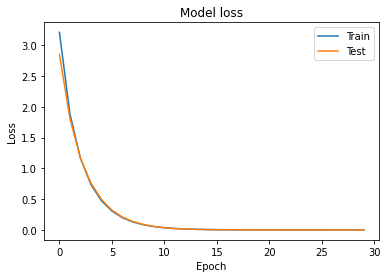

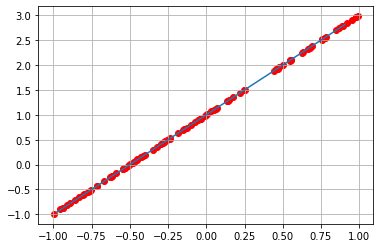

In [5]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score2 = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Commenti

Aumentando il numero di dati di training il modello risulta molto più efficiente nella stima dei parametri e nel rappresentare i dati "ideali" di target.